# <font color='violet'> PREDICTIVE MODEL FOR A DELIVERY COMPANY

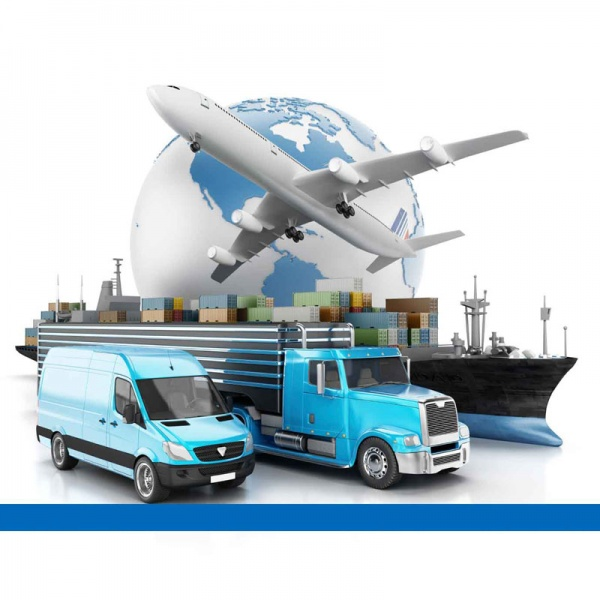

##  <font color='violet'>Project Overview

### <font color='violet'> Objective
The primary aim of this project is to predict failures (`failure` column) in devices using a classification model. The dataset contains device operational data, with multiple attributes providing information about each device's status and performance metrics.
The challenge involves handling the class imbalance in the `failure` column and identifying meaningful patterns that contribute to failures.

By building a robust predictive model, we aim to improve failure prediction accuracy, which can be valuable in proactive maintenance strategies and reducing downtime.

### <font color='violet'>  Dataset Description
The dataset consists of the following columns:

| **Column**     | **Description**                                                                                     |
|-----------------|-----------------------------------------------------------------------------------------------------|
| `date`         | The date when the data was recorded. It helps track device performance over time.                    |
| `device`       | A unique identifier for each device. It distinguishes data from different devices.                   |
| `failure`      | The target variable indicating if a failure occurred. **0** = No failure, **1** = Failure.           |
| `attribute1`   | A numerical attribute representing a device-specific metric.                                         |
| `attribute2`   | A numerical attribute representing a device-specific metric.                                         |
| `attribute3`   | A numerical attribute representing a device-specific metric.                                         |
| `attribute4`   | A numerical attribute representing a device-specific metric.                                         |
| `attribute5`   | A numerical attribute representing a device-specific metric.                                         |
| `attribute6`   | A numerical attribute representing a device-specific metric.                                         |
| `attribute7`   | A numerical attribute representing a device-specific metric.                                         |
| `attribute8`   | A numerical attribute representing a device-specific metric.                                         |
| `attribute9`   | A numerical attribute representing a device-specific metric.                                         |

## <font color='violet'> Requirements

In [3]:
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

## <font color='violet'> Import Dataset

In [5]:
df=pd.read_csv('failure.csv')

In [6]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


## <font color='violet'> EDA (Exploratory Data Analysis)

In [8]:
# unbalanced dataset
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [9]:
df.columns

Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'],
      dtype='object')

In [10]:
df.shape

(124494, 12)

In [11]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [12]:
df.sample(3)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
44626,2015-03-01,S1F0RS72,0,188363368,0,0,0,8,283656,0,0,15
107168,2015-07-27,S1F135DG,0,15180936,0,0,0,11,244068,0,0,3
41529,2015-02-24,W1F0PAXH,0,78783984,0,0,0,14,321513,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [14]:
# there is no NaN values
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [15]:
df['device'].value_counts().nlargest(30)

device
S1F0FGBQ    304
W1F0SJJ2    304
Z1F0GE1M    304
Z1F0KJDS    304
Z1F0KKN4    304
W1F0JY02    304
W1F0JXDL    304
W1F0JH87    304
S1F0E9EP    304
W1F0G9T7    304
S1F0EGMT    304
W1F0FZPA    304
W1F0FY92    304
Z1F0QLC1    304
S1F0FP0C    304
W1F0FEH7    304
S1F0GCED    304
S1F0GGPP    304
S1F0GPXY    304
W1F05X69    304
S1F0H6JG    304
S1F0KYCR    304
Z1F0MA1S    304
Z1F0Q8RT    304
Z1F0QK05    304
Z1F0GB8A    304
Z1F0QL3N    304
W1F0T0B1    299
S1F13CMG    295
Z1F1479Y    295
Name: count, dtype: int64

##  <font color='violet'> Data Visualization

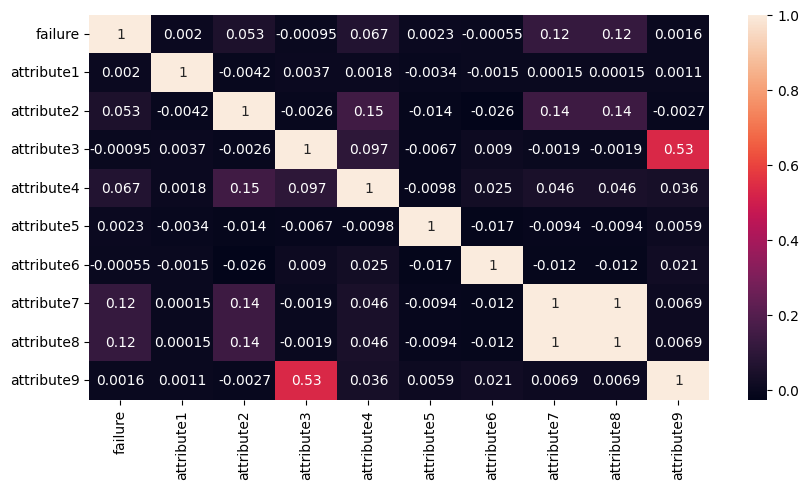

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True);

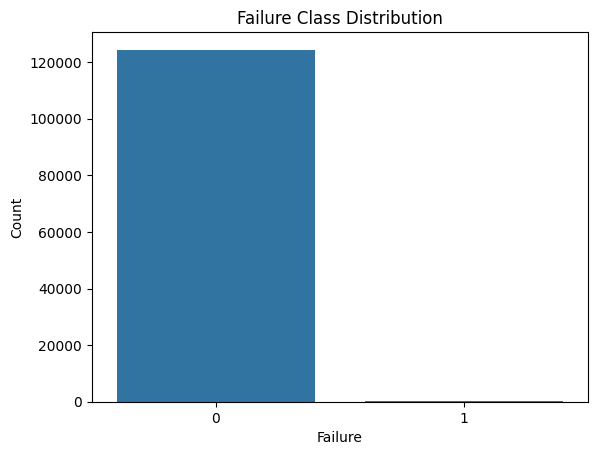

In [18]:
sns.countplot(x='failure', data=df)
plt.title('Failure Class Distribution')
plt.xlabel('Failure')
plt.ylabel('Count');

Text(0.5, 1.02, 'Pairwise Relationships')

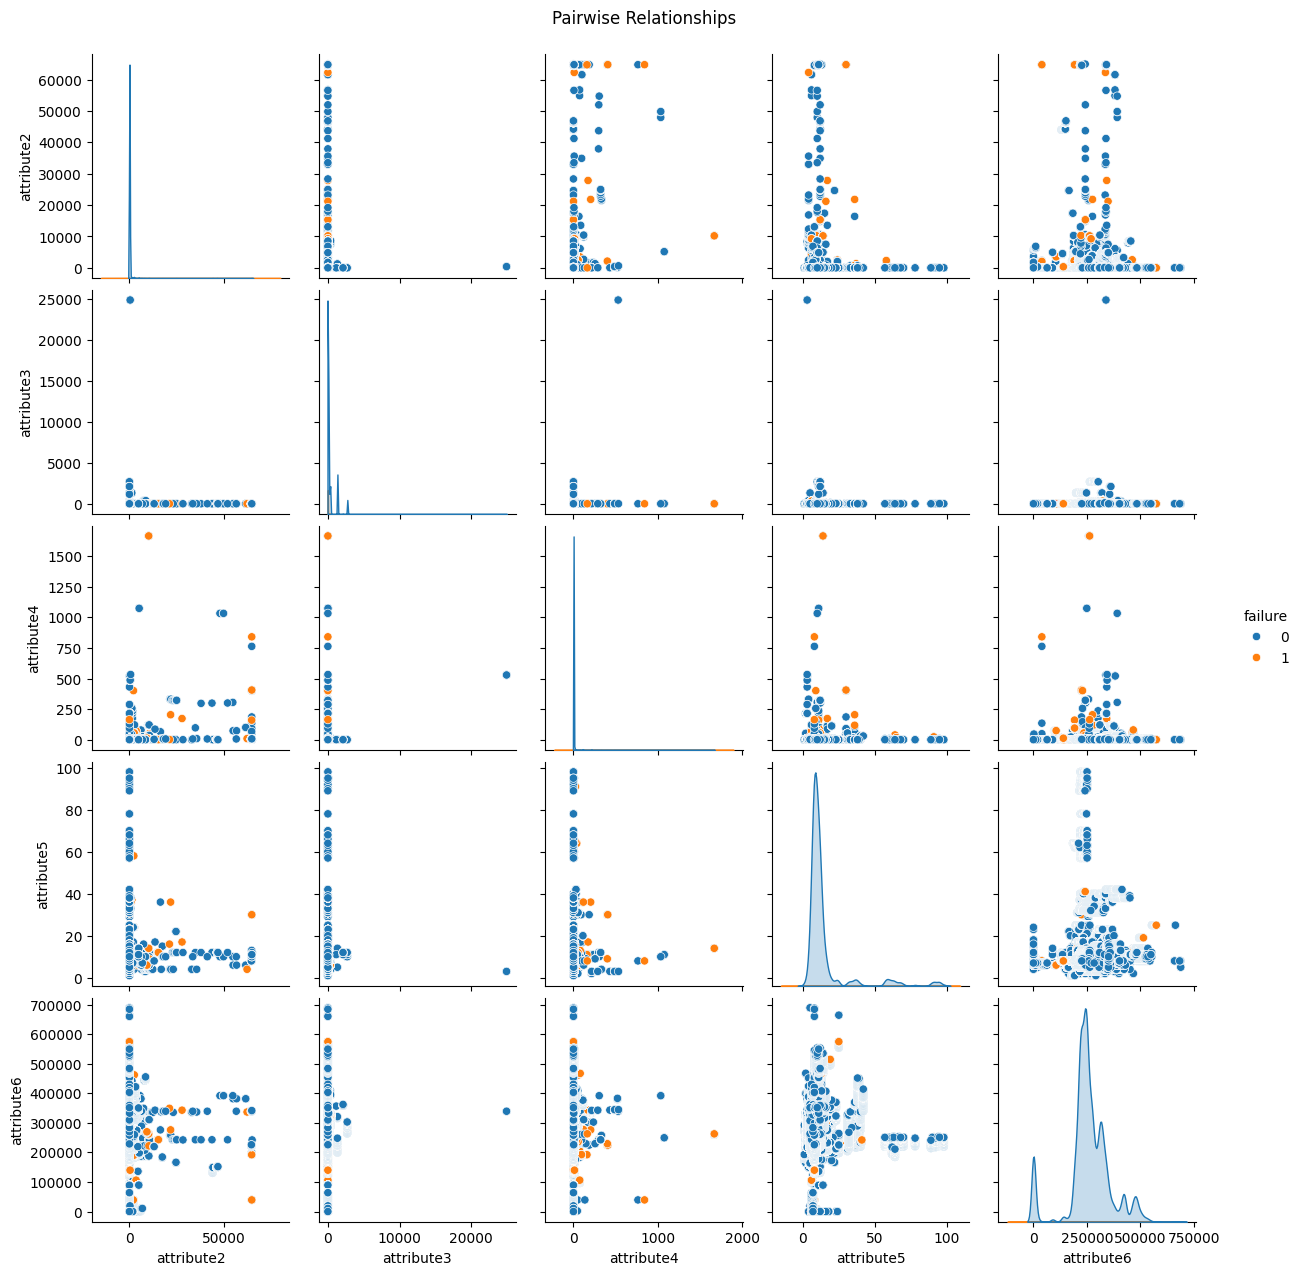

In [19]:
subset = df[['attribute2','attribute3', 'attribute4', 'attribute5','attribute6', 'failure']]
sns.pairplot(subset, hue='failure', diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)

##  <font color='violet'> Modelling 

In [21]:
x=df[['attribute2','attribute3','attribute4','attribute5','attribute6']]
y=df[['failure']]

###  <font color='violet'> Balance Dataset 

In [23]:
x.shape

(124494, 5)

In [24]:
y.shape

(124494, 1)

In [25]:
y['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [26]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [27]:
x.shape

(248776, 5)

In [28]:
y.shape

(248776, 1)

In [29]:
y['failure'].value_counts()

failure
0    124388
1    124388
Name: count, dtype: int64

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def classification_test(x,y,confusion_mtr=False,classification_rpt=False):
    g=GaussianNB()
    b=BernoulliNB()
    l=LogisticRegression()
    d=DecisionTreeClassifier()
    rf=RandomForestClassifier()
    h=GradientBoostingClassifier()
    k=KNeighborsClassifier()
    
    algos=[g,b,l,d,rf,h,k]
    algo_names=['Gaussian NB','Bernoulli NB','Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','KNeighbors Classifier']

    accuracy=[]
    confusion=[]
    classification=[]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    result=pd.DataFrame(columns=['Accuracy Score','Confusion Matrix','Classification Report'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test,p))
        confusion.append(confusion_matrix(y_test,p)**0.5)
        classification.append(classification_report(y_test,p))

    result['Accuracy Score']=accuracy
    result['Confusion Matrix']=confusion
    result['Classification Report']=classification

    r_table=result.sort_values('Accuracy Score',ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
                confusion_mat = np.array(row['Confusion Matrix'])
                print(f"Confusion Matrix of {index}")
                plt.figure(figsize=(5,4))
                sns.heatmap(confusion_mat,annot=True)
                plt.show()
    if classification_rpt:
        for index, row in r_table.iterrows():
                print(f"Classification Report of {index}:")
                print(row['Classification Report'])

        
    return r_table[['Accuracy Score']]
    

Confusion Matrix of Random Forest Classifier


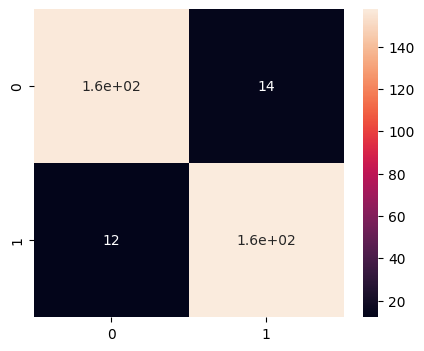

Confusion Matrix of Decision Tree Classifier


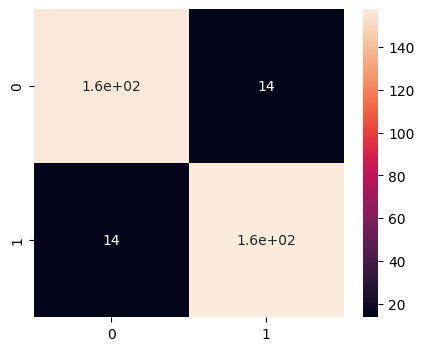

Confusion Matrix of KNeighbors Classifier


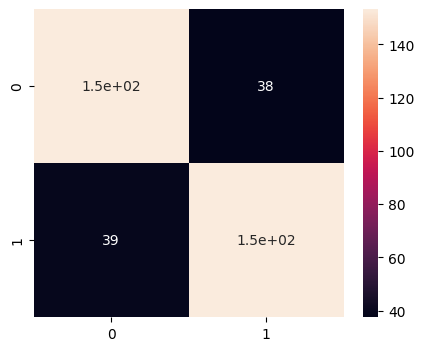

Confusion Matrix of Gradient Boosting Classifier


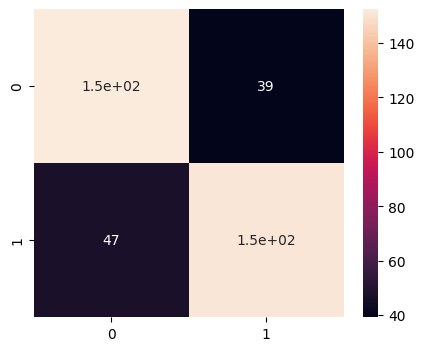

Confusion Matrix of Bernoulli NB


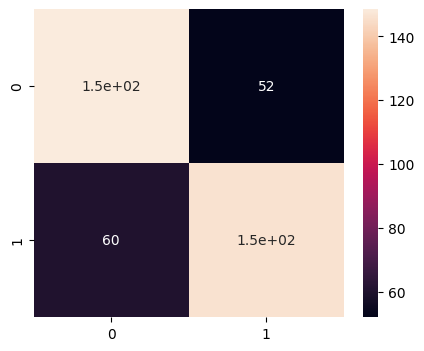

Confusion Matrix of Logistic Regression


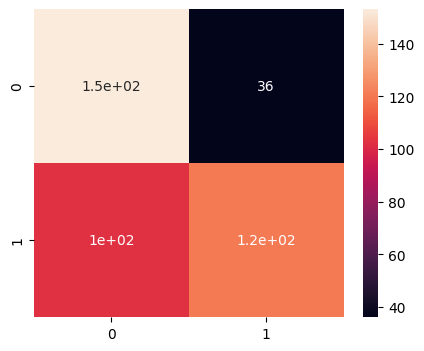

Confusion Matrix of Gaussian NB


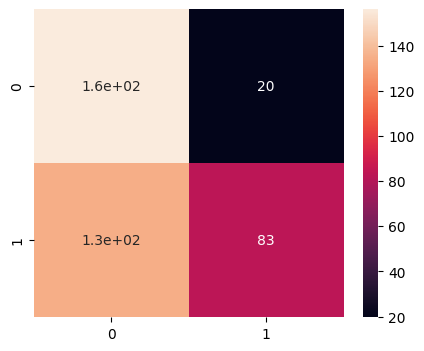

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24752
           1       0.99      0.99      0.99     25004

    accuracy                           0.99     49756
   macro avg       0.99      0.99      0.99     49756
weighted avg       0.99      0.99      0.99     49756

Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24752
           1       0.99      0.99      0.99     25004

    accuracy                           0.99     49756
   macro avg       0.99      0.99      0.99     49756
weighted avg       0.99      0.99      0.99     49756

Classification Report of KNeighbors Classifier:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     24752
           1       0.94      0.94      0.94     25004

    accuracy                    

,Accuracy Score
Random Forest Classifier,0.993327
Decision Tree Classifier,0.992262
KNeighbors Classifier,0.940992
Gradient Boosting Classifier,0.924773
Bernoulli NB,0.873000
Logistic Regression,0.762963
Gaussian NB,0.627181


In [31]:
classification_test(x,y,confusion_mtr=True,classification_rpt=True)

##  <font color='violet'> Model Performance and Interpretation 
The Random Forest Classifier outperforms all other models with an accuracy of **99.33%**, making it the best choice for this dataset.

The Random Forest Classifier demonstrates excellent performance across all metrics, achieving:
- **Precision**: High accuracy in correctly identifying both failure (class 1) and non-failure (class 0).
- **Recall**: Effective in capturing all actual failures and non-failures.
- **F1-Score**: Balanced performance for both classes.

This consistent performance highlights the Random Forest Classifier as the most reliable model for predicting failures.

##  <font color='violet'> Picking the Best Model 

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
predictions=model.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)